# Hypothesis 3: States with higher rates of exonerations for murder will have a higher rate of incarcerations for murder

## Step 1: Set up null and alternative hypotheses

#### Ho: The exoneration for murder rate is not correlated, or negatively correlated with the incarceration for murder rate

#### Ha: The exoneration for murder rate is positively correlated with the incarceration for murder rate


## Step 2: Choose a significance level

In [ ]:
alpha = 0.05

## Step 3: Calculate the test statistic

### Step 3.1: Import Necessary Libraries

In [1]:
# Import Pandas
import pandas as pd


from scipy import stats

### Step 3.2: Load, clean and explore datasets

In [2]:
# Load in and preview first dataset, 'NIJ_exonerations.xlsx'
# This data includes case by case exoneration information in the United States from 1989 to 2019

df1 = pd.read_excel('NIJ_exonerations.xlsx')
df1.head()

,Last Name,First Name,Age,Race,Sex,State,County,Tags,Worst Crime Display,List Add'l Crimes Recode,...,DNA,*,FC,MWID,F/MFE,P/FA,OM,ILD,Posting Date,ID
0,Abbitt,Joseph Lamont,31.0,Black,Male,North Carolina,Forsyth,CV;#IO,Child Sex Abuse,Sexual Assault;#Kidnapping;#Burglary/Unlawful ...,...,DNA,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2011-09-01,3807
1,Abdal,Warith Habib,43.0,Black,Male,New York,Erie,IO,Sexual Assault,Robbery,...,DNA,NaN,NaN,MWID,F/MFE,NaN,OM,NaN,2011-08-29,2978
2,Abernathy,Christopher,17.0,White,Male,Illinois,Cook,CIU;#CV;#H;#IO,Murder,Rape;#Robbery,...,DNA,NaN,FC,NaN,NaN,P/FA,OM,NaN,2015-02-13,4640
3,Abney,Quentin,32.0,Black,Male,New York,New York,CV,Robbery,NaN,...,NaN,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2019-05-13,5553
4,Acero,Longino,35.0,Hispanic,Male,California,Santa Clara,NC;#P,Sex Offender Registration,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ILD,2011-08-29,2979


In [3]:
# Check Columns to see where date exonerated is

df1.columns

Index(['Last Name', 'First Name', 'Age', 'Race', 'Sex', 'State', 'County',
       'Tags', 'Worst Crime Display', 'List Add'l Crimes Recode', 'Occurred',
       'Convicted', 'Exonerated', 'Sentence', 'DNA', '*', 'FC', 'MWID',
       'F/MFE', 'P/FA', 'OM', 'ILD', 'Posting Date', 'ID'],
      dtype='object')

In [4]:
df1['Exonerated'].head()

0    2009
1    1999
2    2015
3    2012
4    2006
Name: Exonerated, dtype: int64

In [5]:
# Check all the unique values in 'Worst Crime Display' to ensure they're are no 
# duplicates for murder or differing values

df1.groupby('Worst Crime Display')['ID'].nunique() # murder - 934

Worst Crime Display
Accessory to Murder                2
Arson                             23
Assault                           96
Attempt, Violent                   4
Attempted Murder                  54
Bribery                            5
Burglary/Unlawful Entry           15
Child Abuse                        9
Child Sex Abuse                  270
Dependent Adult Abuse              1
Destruction of Property            2
Drug Possession or Sale          320
Failure to Pay Child Support       2
Filing a False Report              1
Forgery                            3
Fraud                             40
Harassment                         1
Immigration                        4
Kidnapping                        15
Manslaughter                      46
Menacing                           2
Military Justice Offense           1
Murder                           934
Obstruction of Justice             1
Official Misconduct                2
Other                              9
Other Nonviolent F

In [6]:
# Create a dataframe containing only murder exonerations between 2001 and 2016

murder_ex_df = df1[(df1['Worst Crime Display'] == 'Murder') & (df1['Exonerated'] > 2000) & (df1['Exonerated'] < 2017)]
murder_ex_df.head()

,Last Name,First Name,Age,Race,Sex,State,County,Tags,Worst Crime Display,List Add'l Crimes Recode,...,DNA,*,FC,MWID,F/MFE,P/FA,OM,ILD,Posting Date,ID
2,Abernathy,Christopher,17.0,White,Male,Illinois,Cook,CIU;#CV;#H;#IO,Murder,Rape;#Robbery,...,DNA,NaN,FC,NaN,NaN,P/FA,OM,NaN,2015-02-13,4640
8,Adams,Don Ray,32.0,Black,Male,Pennsylvania,Philadelphia,H,Murder,NaN,...,NaN,NaN,NaN,NaN,NaN,P/FA,OM,NaN,2012-03-13,3880
10,Adams,Johnathan,12.0,White,Male,Georgia,Carroll,CV;#H;#P,Murder,NaN,...,NaN,NaN,FC,NaN,NaN,NaN,OM,NaN,2011-08-29,2981
13,Adams,Laurence,19.0,Black,Male,Massachusetts,Suffolk,H;#JI,Murder,Robbery,...,NaN,NaN,NaN,NaN,NaN,P/FA,OM,ILD,2011-08-29,2983
15,Adams,Reginald,26.0,Black,Male,Louisiana,Orleans,H;#IO,Murder,NaN,...,NaN,NaN,FC,NaN,NaN,P/FA,OM,NaN,2014-05-13,4430


In [7]:
# Confirm/Count Number of Murder exonerations there are in the dataset

len(murder_ex_df)

582

In [8]:
# Count the number of murder exonerations per State

murder_ex_df = murder_ex_df.groupby('State', as_index=False).agg({"Worst Crime Display": "count"})
murder_ex_df = murder_ex_df.rename(columns={'Worst Crime Display': 'murder_exoneration_count'})
murder_ex_df['State'] = murder_ex_df['State'].str.upper() 
murder_ex_df

,State,murder_exoneration_count
0,ALABAMA,6
1,ALASKA,5
2,ARIZONA,7
3,ARKANSAS,1
4,CALIFORNIA,49
5,COLORADO,3
6,CONNECTICUT,9
7,DISTRICT OF COLUMBIA,12
8,FED-MA,1
9,FED-MO,1


In [9]:
# Add Hawaii, Maine, New Hampshire, North Dakota, South Dakota, Maine, Delaware
listOfSeries = [pd.Series(['HAWAII', 0], index=murder_ex_df.columns ), 
                pd.Series(['NEW HAMPSHIRE', 0], index=murder_ex_df.columns), 
                pd.Series(['NORTH DAKOTA', 0], index=murder_ex_df.columns),
                pd.Series(['SOUTH DAKOTA', 0], index=murder_ex_df.columns),
                pd.Series(['MAINE', 0], index=murder_ex_df.columns),
                pd.Series(['DELAWARE', 0], index=murder_ex_df.columns)]


murder_ex_df = murder_ex_df.append(listOfSeries , ignore_index=True)

,State,murder_exoneration_count
0,ALABAMA,6
1,ALASKA,5
2,ARIZONA,7
3,ARKANSAS,1
4,CALIFORNIA,49
5,COLORADO,3
6,CONNECTICUT,9
7,DISTRICT OF COLUMBIA,12
8,FED-MA,1
9,FED-MO,1


In [10]:
#murder_df.reset_index(inplace=True)

In [11]:
#murder_df = murder_df.sort_index
#type(murder_df) - method

In [12]:
crime_and_incarceration_df = pd.read_csv('crime_and_incarceration_by_state.csv')
crime_and_incarceration_df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0


In [13]:
len(crime_and_incarceration_df)

816

In [14]:
type(crime_and_incarceration_df['year'][789])

numpy.int64

In [15]:
# Select subset with only needed items

crime_and_incarceration_df = crime_and_incarceration_df[['jurisdiction','murder_manslaughter', 'state_population']]
crime_and_incarceration_df.head()

,jurisdiction,murder_manslaughter,state_population
0,FEDERAL,NaN,NaN
1,ALABAMA,379.0,4468912.0
2,ALASKA,39.0,633630.0
3,ARIZONA,400.0,5306966.0
4,ARKANSAS,148.0,2694698.0


In [16]:
crime_and_incarceration_df=crime_and_incarceration_df.groupby('jurisdiction').agg({"murder_manslaughter": "sum", "state_population": "mean"})
crime_and_incarceration_df = crime_and_incarceration_df.rename(columns={'murder_manslaughter': 'murder_manslaughter_count'})
crime_and_incarceration_df.head()

,murder_manslaughter_count,state_population
jurisdiction,,
ALABAMA,5369.0,4.683265e+06
ALASKA,585.0,6.940597e+05
ARIZONA,6545.0,6.259752e+06
ARKANSAS,2771.0,2.859158e+06
CALIFORNIA,33486.0,3.703048e+07
COLORADO,2672.0,4.955748e+06
CONNECTICUT,1746.0,3.533440e+06
DELAWARE,685.0,8.783401e+05
FEDERAL,0.0,NaN


In [17]:
len(crime_and_incarceration_df)

51

In [18]:
new_df = pd.merge(crime_and_incarceration_df, murder_ex_df, left_on='jurisdiction', right_on='State')
new_df.head()

,murder_manslaughter_count,state_population,State,murder_exoneration_count
0,5369.0,4.683265e+06,ALABAMA,6
1,585.0,6.940597e+05,ALASKA,5
2,6545.0,6.259752e+06,ARIZONA,7
3,2771.0,2.859158e+06,ARKANSAS,1
4,33486.0,3.703048e+07,CALIFORNIA,49


In [19]:
final_df = new_df[['State', 'murder_exoneration_count', 'murder_manslaughter_count', 'state_population']]
final_df.head()

,State,murder_exoneration_count,murder_manslaughter_count,state_population
0,ALABAMA,6,5369.0,4.683265e+06
1,ALASKA,5,585.0,6.940597e+05
2,ARIZONA,7,6545.0,6.259752e+06
3,ARKANSAS,1,2771.0,2.859158e+06
4,CALIFORNIA,49,33486.0,3.703048e+07


In [20]:
final_df['exoneration_rate'] = final_df['murder_exoneration_count']/final_df['state_population']
final_df['incarceration_rate'] = final_df['murder_manslaughter_count']/final_df['state_population']


/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
final_df # No DC or Puerto Rico

,State,murder_exoneration_count,murder_manslaughter_count,state_population,exoneration_rate,incarceration_rate
0,ALABAMA,6,5369.0,4.683265e+06,1.281157e-06,0.001146
1,ALASKA,5,585.0,6.940597e+05,7.203991e-06,0.000843
2,ARIZONA,7,6545.0,6.259752e+06,1.118255e-06,0.001046
3,ARKANSAS,1,2771.0,2.859158e+06,3.497533e-07,0.000969
4,CALIFORNIA,49,33486.0,3.703048e+07,1.323234e-06,0.000904
5,COLORADO,3,2672.0,4.955748e+06,6.053577e-07,0.000539
6,CONNECTICUT,9,1746.0,3.533440e+06,2.547093e-06,0.000494
7,DELAWARE,0,685.0,8.783401e+05,0.000000e+00,0.000780
8,FLORIDA,14,16307.0,1.850552e+07,7.565309e-07,0.000881
9,GEORGIA,9,9696.0,9.510082e+06,9.463641e-07,0.001020


In [27]:
from scipy import stats
stats.pearsonr(final_df.incarceration_rate, final_df.exoneration_rate)

(0.3248629574296367, 0.021343638483385798)

In [28]:
0.3248629574296367**2

0.10553594110992996

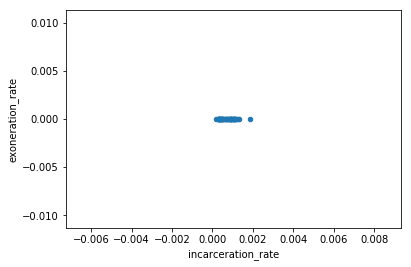

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

final_df.plot(kind='scatter', x='incarceration_rate', y='exoneration_rate')
#plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()